This is a tutorial for basic use of abides_markets simulation.
It uses the simulator directly without the OpenAI Gym interface

In [22]:
!git clone https://github.com/jgruber99/final_version.git
!cp -r final_version/* .
!bash install.sh 

fatal: destination path 'final_version' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running install
running bdist_egg
running egg_info
writing abides_core.egg-info/PKG-INFO
writing dependency_links to abides_core.egg-info/dependency_links.txt
writing top-level names to abides_core.egg-info/top_level.txt
reading manifest file 'abides_core.egg-info/SOURCES.txt'
writing manifest file 'abides_core.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/kernel.py -> build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/message.py -> build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/l

In [1]:
!ls

 abides-core		     install.sh		    plots
 abides-gym		     interesting_links.md   profiling
 abides-jpmc-public	     LICENSE		    ReadingList.md
 abides-markets		     LICENSE.txt	    README.md
 CHANGELOG.md		     log		    requirements-dev.txt
 Demo_ABIDES-Gym.ipynb	    'Main paper summary'    requirements.txt
 Demo_ABIDES-Gym.py	     Meeting_23_10.md	    sample_data
 demo_ABIDES-Markets.ipynb   Meeting_template.md    setup-dev.sh
 demo_ABIDES-Markets.py      mypy.ini		    Untitled1.ipynb
 DEVELOPER-GUIDE.md	     notebooks		    venv
 final_version		    'petros readings'	    version_testing


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from abides_core import abides
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
from abides_markets.configs import rmsc01, rmsc02, rmsc03, rmsc05, rmsc04, rmsc06

fatal: destination path 'final_version' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 113.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.

In [20]:
!bash install.sh 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running install
running bdist_egg
running egg_info
writing abides_core.egg-info/PKG-INFO
writing dependency_links to abides_core.egg-info/dependency_links.txt
writing top-level names to abides_core.egg-info/top_level.txt
reading manifest file 'abides_core.egg-info/SOURCES.txt'
writing manifest file 'abides_core.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/kernel.py -> build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/message.py -> build/bdist.linux-x86_64/egg/abides_core
copying build/lib/abides_core/latency_model.py -> build/bdist.linux-x86_64/egg/abid

In [18]:
!ls

 abides-core		     install.sh		    plots
 abides-gym		     interesting_links.md   profiling
 abides-jpmc-public	     LICENSE		    ReadingList.md
 abides-markets		     LICENSE.txt	    README.md
 CHANGELOG.md		     log		    requirements-dev.txt
 Demo_ABIDES-Gym.ipynb	    'Main paper summary'    requirements.txt
 Demo_ABIDES-Gym.py	     Meeting_23_10.md	    sample_data
 demo_ABIDES-Markets.ipynb   Meeting_template.md    setup-dev.sh
 demo_ABIDES-Markets.py      mypy.ini		    Untitled1.ipynb
 DEVELOPER-GUIDE.md	     notebooks		    venv
 final_version		    'petros readings'	    version_testing


## Build runnable configuration

Here we are generating/building a config from the config file rmsc04. 
The config object is a dictionnary containing key elements like, start time, end time, agents to be used, latency and computation delay models.

In [3]:
config = rmsc06.build_config()
plot_name = "m_m_alpha"

In [4]:
config.keys()

dict_keys(['seed', 'start_time', 'stop_time', 'agents', 'agent_latency_model', 'default_computation_delay', 'custom_properties', 'random_state_kernel', 'stdout_log_level'])

In [5]:
config.keys()

dict_keys(['seed', 'start_time', 'stop_time', 'agents', 'agent_latency_model', 'default_computation_delay', 'custom_properties', 'random_state_kernel', 'stdout_log_level'])

## Running simulation

Once the config is ready it can be run using the abides runner function.
It instanciates a simulation kernel, runs the configuration and returns an end_state that mostly contains pointers to the different agent objects.
The agents are in their final state, their internal variables can be accessed to extract informations of interests like logs.

In [6]:
end_state = abides.run( config )

[10615] INFO abides Simulation Start Time: 2023-01-13 13:11:20.917602
[10615] INFO abides_core.kernel --- Simulation time: 2021-02-05 00:00:00, messages processed: 0, wallclock elapsed: 0.00s ---
/usr/local/lib/python3.8/dist-packages/abides_markets-0.0.0-py3.8.egg/abides_markets/order_book.py:102: UserWarning: ABM order discarded. Limit price (-137961) must be a positive integer.
/usr/local/lib/python3.8/dist-packages/abides_markets-0.0.0-py3.8.egg/abides_markets/order_book.py:102: UserWarning: ABM order discarded. Limit price (-111811) must be a positive integer.
/usr/local/lib/python3.8/dist-packages/abides_markets-0.0.0-py3.8.egg/abides_markets/order_book.py:102: UserWarning: ABM order discarded. Limit price (-85661) must be a positive integer.
/usr/local/lib/python3.8/dist-packages/abides_markets-0.0.0-py3.8.egg/abides_markets/order_book.py:102: UserWarning: ABM order discarded. Limit price (-59511) must be a positive integer.
/usr/local/lib/python3.8/dist-packages/abides_markets-

## Retrieving results from end_state

By convention in abides_markets configuration the first agent is the exchange agent. 
It contains an order_book. By default it logs its history.

In [7]:
order_book = end_state["agents"][0].order_books["ABM"]

### Order book history L1

L1 data snapshots for every tick can be extracted
( best bid and ask price and quantity )

In [8]:
L1 = order_book.get_L1_snapshots()

Here we plot the time series of the best bid and best ask price thoughout the simulation

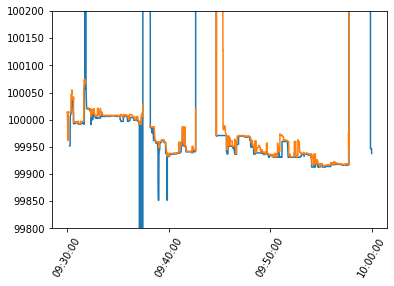

In [9]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

plt.plot(best_bids.time,best_bids.price)
plt.plot(best_asks.time,best_asks.price)

band = 200
plt.ylim(100_000-band,100_000+band)

time_mesh = np.arange(
    str_to_ns("09:30:00"),
    str_to_ns("10:10:00"),
    1e9*60*10
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

plt.savefig("plots/" + plot_name + "L1.pdf")

### Order book history L2

L2 data snapshots for every tick can be extracted
( bids and asks price and quantity for every orderbook level. Here max depth logged is a parameter of the simulation and max number of levels we want to retrieve from the orderbook after the simulation is a parameter too)

In [10]:
L2 = order_book.get_L2_snapshots(nlevels=10)

OverflowError: ignored

As an illustration we plot the time series of the fifth best bid price and fifth best ask price throughout the simulation

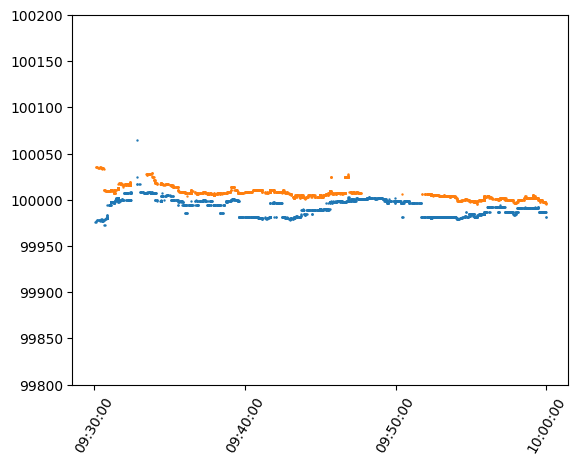

In [ ]:
## plotting fifth best bid and fifth best ask
times = [ t - ns_date(t) for t in L2["times"] ]
plt.scatter( times, L2["bids"][:,5,0], s=.5 )
plt.scatter( times, L2["asks"][:,5,0], s=.5 )

band = 200
plt.ylim(100_000-band,100_000+band)

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )
plt.savefig("plots/"+ plot_name+ "L2.pdf")


### Looking at agents logs

All agents can be inspected to retrieve desired information. 
The utility parse_logs_df for instance provides a quick way to retrieve and aggregate the log variables of each agent in a single dataframe

In [ ]:
logs_df = parse_logs_df( end_state )

#### Histogram of order submission times for noise agents

As an illustration we retrieve the submission times of all the orders sent by noise agent and display the histogram of all these times

(array([  0.,   0.,   0.,   0.,   0., 148.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

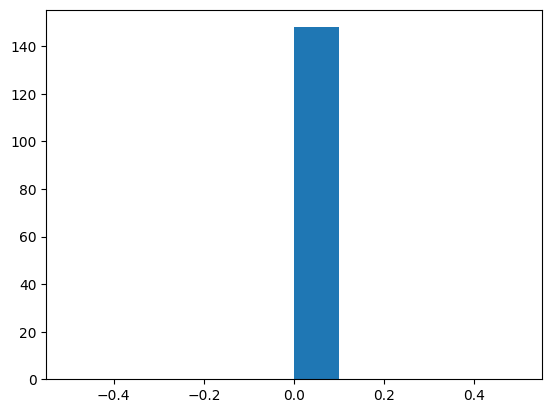

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "NoiseAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

#_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )





We proceed the same way for value agents as well

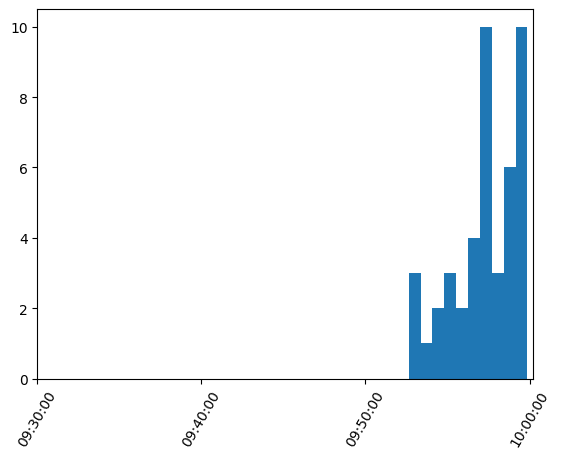

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "MomentumAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )